In [174]:
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [175]:
# path = f'../SI_Toolkit_ASF/Experiments/0_LSTM/Recordings_preprocessed/Train/*.csv'
path = f'../../SI_Toolkit_ASF/Experiments/Experiment-0_final/Recordings_preprocessed/Train/*.csv'

files = glob.glob(path)
dfs = []
for file in files:
    dfs.append(pd.read_csv(file, skiprows=8))
frame = pd.concat(dfs, axis=0, ignore_index=True)
exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
frame = frame[[col for col in frame.columns if not any(tmp in col for tmp in exclude)]]
frame.describe()

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,D_car_pose_x,D_car_pose_y
count,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000,270009.000000
mean,199.610275,0.000216,4.534410,-0.000751,4.298084,-5.650984,0.959563,2.308275,0.000181,0.000117,78.807306,-0.001911,0.062677,-0.001149,0.573892,0.019068,-0.001236,0.000419,4.220263,0.000438
std,115.628953,0.194491,1.999569,1.794989,1.728191,39.684147,66.089712,57.380800,0.122948,0.159688,46.661908,3.271810,3.255546,1.769222,4.393661,12.413139,0.732865,1.151156,1.679366,0.822372
min,0.000000,-0.812875,1.001037,-11.044722,1.001043,-159.794830,-203.858830,-204.394100,-0.784039,-0.418900,0.000000,-7.949448,-7.937908,-10.724926,-9.010005,-49.998154,-2.999791,-3.200000,0.000000,-3.998245
25%,99.400000,-0.131033,2.818940,-1.009548,2.907960,-30.006178,-38.726120,-37.207005,-0.042579,-0.107365,39.000000,-2.440929,-2.389050,-1.003468,-0.003672,-5.165403,-0.297327,-0.340316,2.869218,-0.218215
50%,198.880000,-0.000623,4.567196,-0.003735,4.275991,-1.479374,6.440960,2.361340,-0.000144,-0.000170,77.000000,-0.014496,0.115585,-0.004649,0.171328,-0.015081,0.000570,0.000000,4.197698,0.000163
75%,300.080000,0.131384,6.258178,1.008209,5.675281,20.551762,42.831825,37.416622,0.043144,0.107519,118.000000,2.465343,2.503872,1.001644,1.977634,5.164981,0.295977,0.341024,5.554131,0.219952
max,399.960000,0.908353,7.999528,10.678287,7.983563,113.851395,219.587570,202.566450,0.784404,0.418900,182.000000,7.897949,7.962370,10.717392,9.010005,49.999370,2.999360,3.200000,7.968345,3.999738


In [176]:
len(frame)

270009

In [177]:
frame.groupby('experiment_index').size().describe()

count     182.000000
mean     1483.565934
std       624.170790
min        47.000000
25%      1168.500000
50%      1492.500000
75%      1955.500000
max      2650.000000
dtype: float64

In [178]:
# for df in dfs:
#     print(df.groupby('experiment_index').size())

# Some Plots

<AxesSubplot:>

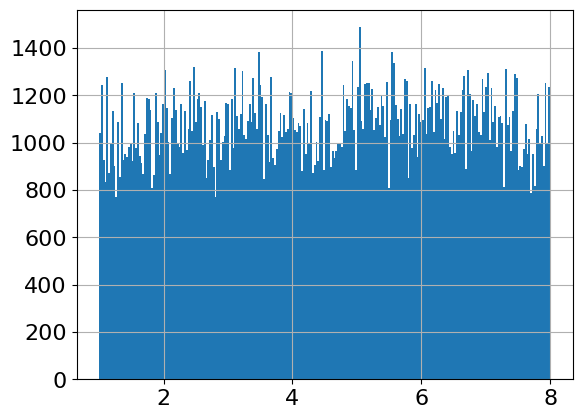

In [179]:
frame.translational_control.hist(bins=250)

<AxesSubplot:>

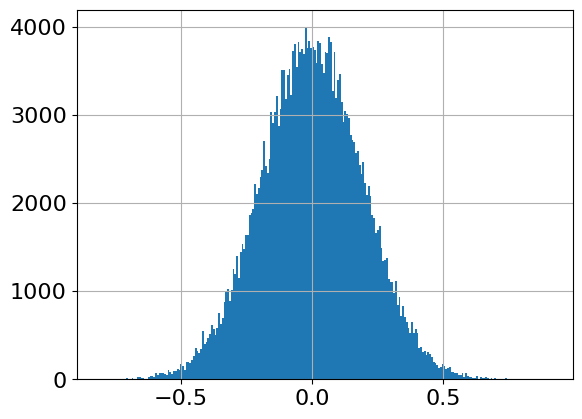

In [180]:
frame.angular_control.hist(bins=250)

<AxesSubplot:>

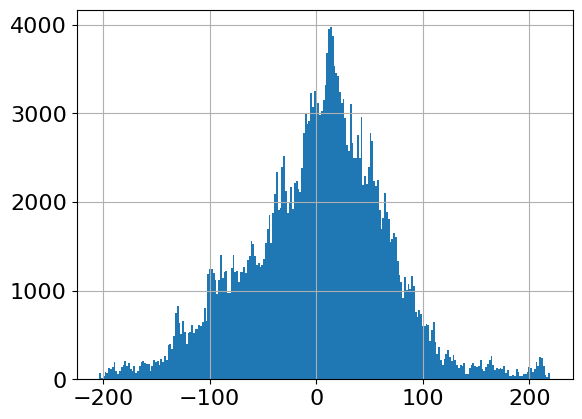

In [181]:
frame.pose_x.hist(bins=250)

<AxesSubplot:>

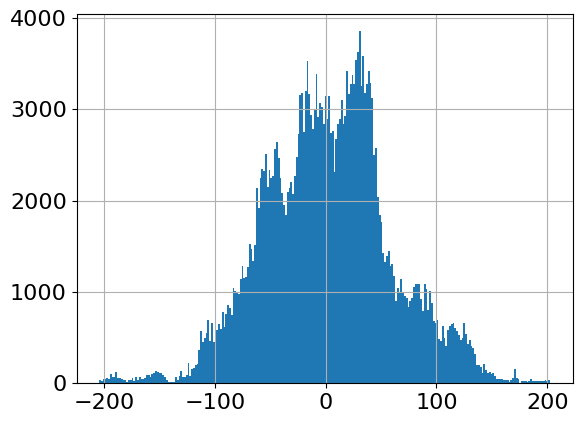

In [182]:
frame.pose_y.hist(bins=250)

<AxesSubplot:>

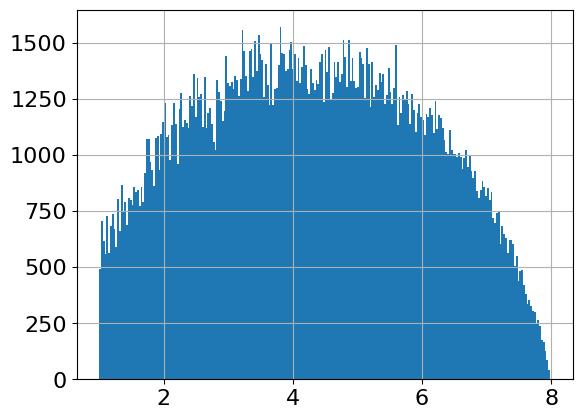

In [183]:
frame.linear_vel_x.hist(bins=250)

Text(0, 0.5, 'Number of datapoints')

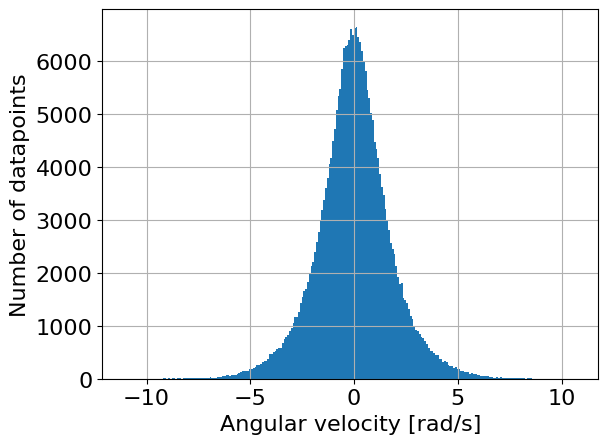

In [184]:
frame.angular_vel_z.hist(bins=250)
plt.xlabel('Angular velocity [rad/s]')
plt.ylabel('Number of datapoints')

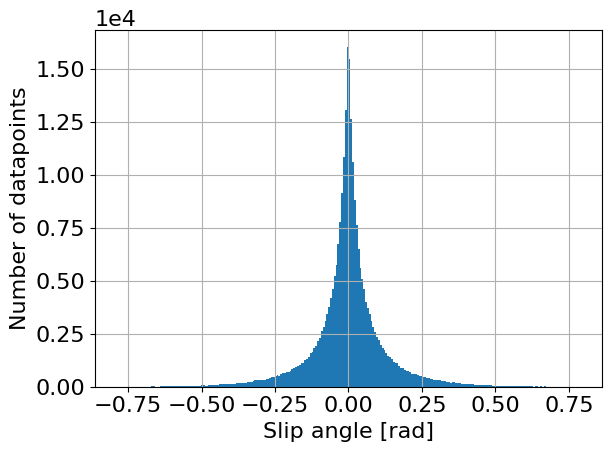

In [209]:
frame.slip_angle.hist(bins=250)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.xlabel('Slip angle [rad]')
plt.ylabel('Number of datapoints')
plt.tight_layout()

<AxesSubplot:>

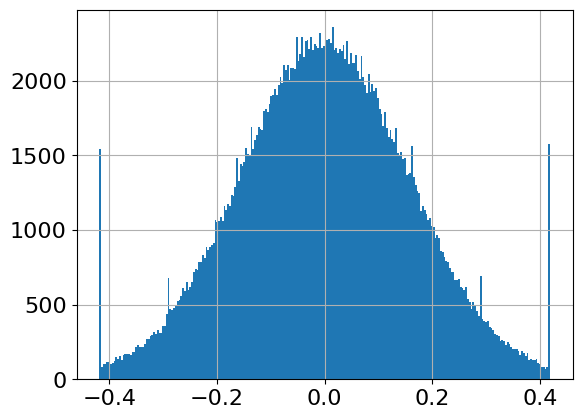

In [186]:
frame.steering_angle.hist(bins=250)

## Delta values

In [187]:
delta_frame = frame[frame.time != 0.00]

<AxesSubplot:>

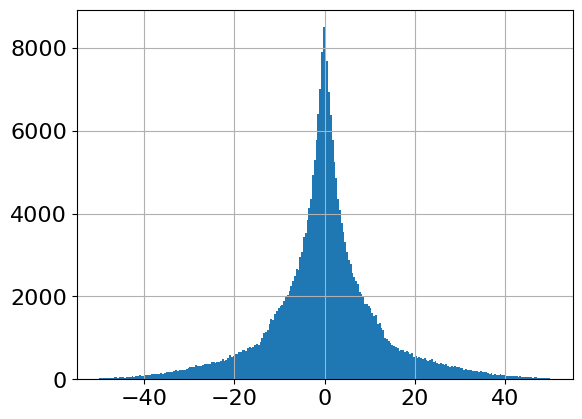

In [188]:
delta_frame.D_angular_vel_z.hist(bins=250)

<AxesSubplot:>

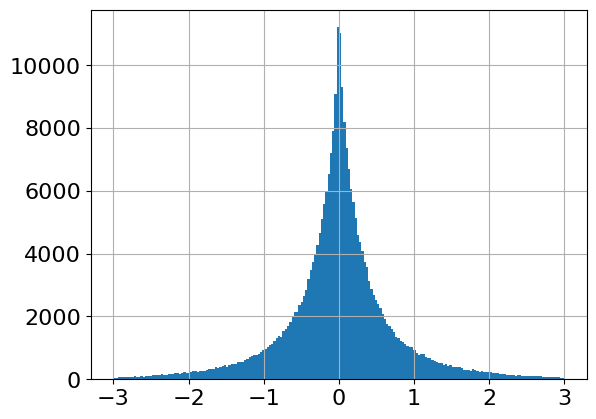

In [189]:
delta_frame.D_slip_angle.hist(bins=200)

<AxesSubplot:>

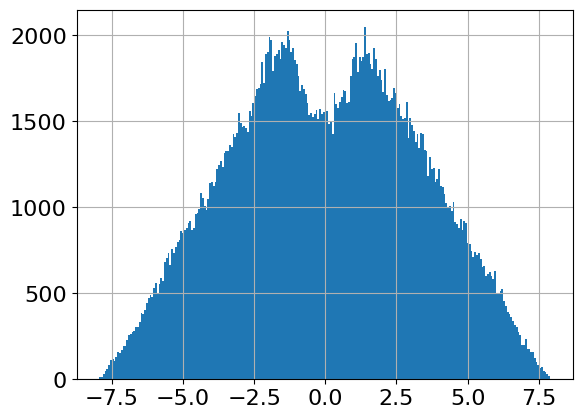

In [190]:
delta_frame.D_pose_x.hist(bins=250)

<AxesSubplot:>

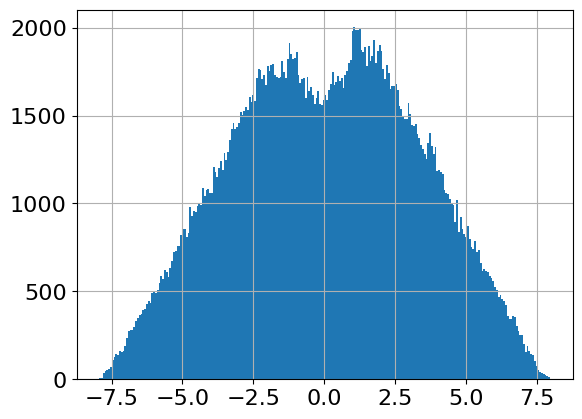

In [191]:
delta_frame.D_pose_y.hist(bins=250)

<AxesSubplot:>

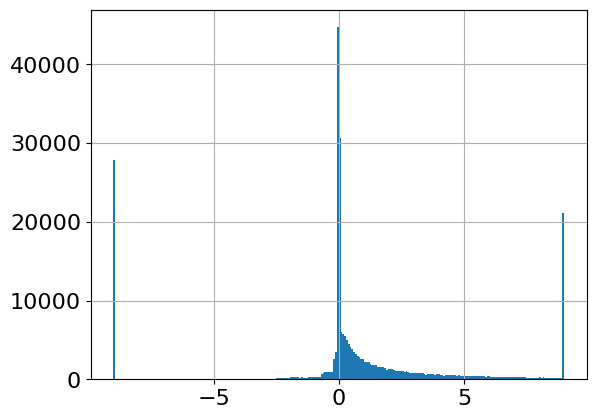

In [192]:
delta_frame.D_linear_vel_x.hist(bins=250)

<AxesSubplot:>

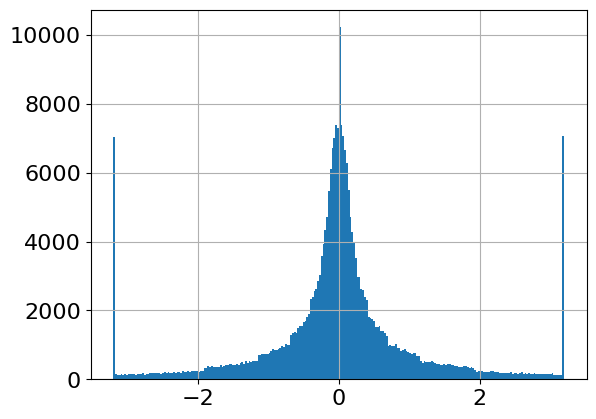

In [193]:
delta_frame.D_steering_angle.hist(bins=250)
# plt.ylim((0, 1000))

# Explore D_linear_vel_x

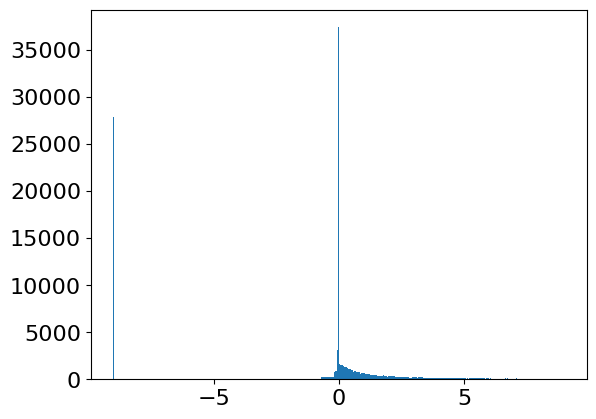

In [194]:
hist = plt.hist(delta_frame.D_linear_vel_x, bins=1000)

In [195]:
hist[1][40:60]

array([-8.2892046 , -8.27118459, -8.25316458, -8.23514457, -8.21712456,
       -8.19910455, -8.18108454, -8.16306453, -8.14504452, -8.12702451,
       -8.1090045 , -8.09098449, -8.07296448, -8.05494447, -8.03692446,
       -8.01890445, -8.00088444, -7.98286443, -7.96484442, -7.94682441])

<AxesSubplot:>

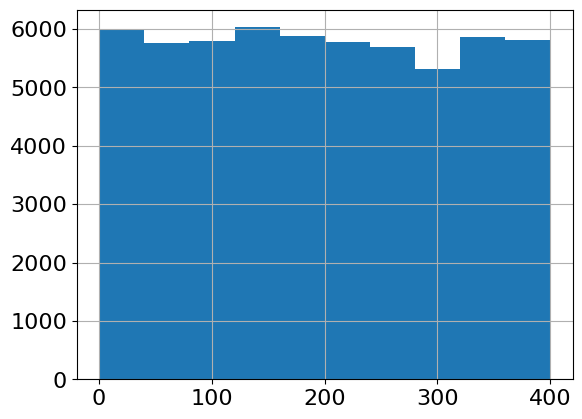

In [196]:
delta_frame[delta_frame.D_linear_vel_x.between(-0.01, 0.0)].time.hist()

# Explore dependencies

<AxesSubplot:xlabel='angular_vel_z', ylabel='D_angular_vel_z'>

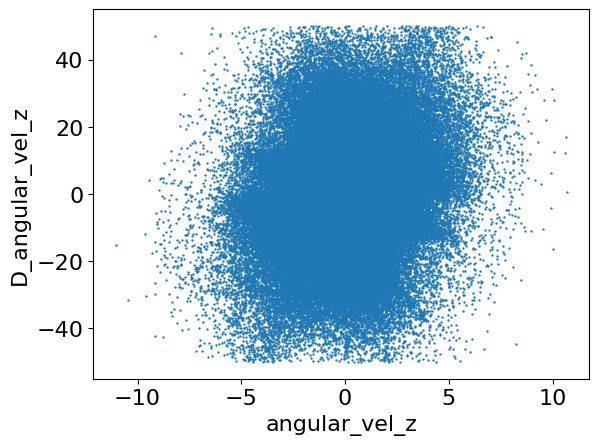

In [197]:
delta_frame.plot.scatter(x='angular_vel_z', y='D_angular_vel_z', s=0.5)

<AxesSubplot:xlabel='linear_vel_x', ylabel='D_linear_vel_x'>

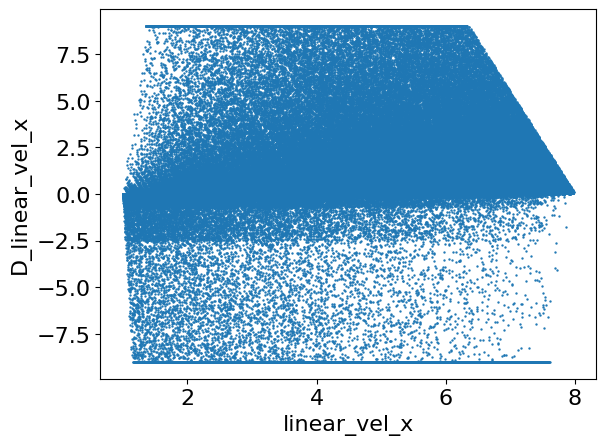

In [198]:
delta_frame.plot.scatter(x='linear_vel_x', y='D_linear_vel_x', s=0.5)

<AxesSubplot:xlabel='slip_angle', ylabel='D_slip_angle'>

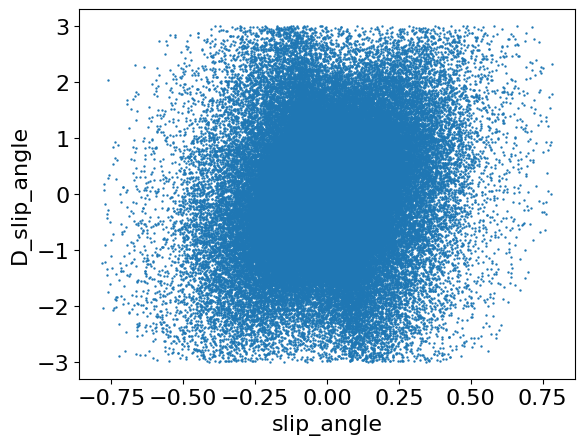

In [199]:
delta_frame.plot.scatter(x='slip_angle', y='D_slip_angle', s=0.5)

<AxesSubplot:xlabel='angular_vel_z', ylabel='slip_angle'>

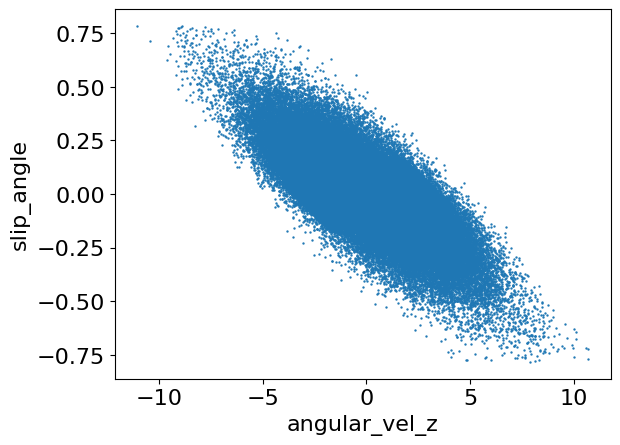

In [200]:
delta_frame.plot.scatter(x='angular_vel_z', y='slip_angle', s=0.5)

# Explore linear velocity

In [201]:
# frame[frame.D_linear_vel_x > 9.01]

In [202]:
# high_D_lin = frame[frame.experiment_index == 2530]
# high_D_lin

# Explore slip angle

In [203]:
frame[frame.slip_angle.between(-0.01, 0.01)].groupby('experiment_index').size()

experiment_index
0      539
1      387
2      209
3      299
4      294
      ... 
178      4
179     38
180     19
181     11
182     11
Length: 182, dtype: int64

In [204]:
frame.groupby('experiment_index').size()

experiment_index
0      2650
1      1912
2      1859
3      1555
4      1671
       ... 
178      47
179     147
180      68
181      93
182     125
Length: 182, dtype: int64

In [205]:
no_slip = frame[frame.slip_angle.between(-0.005, 0.005)].groupby('experiment_index').size() 
no_slip_diff = (no_slip / frame.groupby('experiment_index').size().reindex(no_slip.index) * 100).sort_values(ascending=False)
no_slip_diff

experiment_index
175    20.270270
173    17.605634
19     14.795918
40     14.233129
160    14.195980
         ...    
170     6.185567
2       5.110274
182     4.800000
178     4.255319
166     3.305785
Length: 182, dtype: float64

In [206]:
frame[frame.experiment_index.isin(no_slip_diff.iloc[0:25].index)]

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle,D_car_pose_x,D_car_pose_y
965,44.00,0.184500,2.427660,-4.760792,6.739376,-9.747123,65.457954,0.718150,0.327599,0.004707,15,-6.955147,-0.336579,-4.291010,-9.009981,-25.070906,2.592068,2.996552,6.490298,2.522574
966,44.04,0.184500,2.427660,-4.612318,6.378977,-9.936319,65.193920,0.724253,0.436040,0.076624,15,-6.600952,0.152585,-4.729915,-9.009981,3.711855,2.711017,1.797931,5.830665,3.098258
967,44.08,0.184500,2.427660,-4.290616,6.018578,-10.115833,64.945800,0.751971,0.514729,0.119774,15,-6.202889,0.692955,-4.487848,-9.009981,8.042550,1.967225,1.078759,5.221439,3.419443
968,44.12,0.184500,2.427660,-3.982505,5.658178,-10.282662,64.716220,0.803109,0.562236,0.145665,15,-5.739593,1.278454,-4.170728,-9.009981,7.702756,1.187694,0.647256,4.721020,3.505617
969,44.16,0.184500,2.427660,-3.668536,5.297779,-10.437286,64.508400,0.877616,0.582764,0.161199,15,-5.195427,1.862670,-3.865600,-9.009981,7.849240,0.513187,0.388353,4.332047,3.419849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269818,390.80,-0.279876,7.713273,-3.374797,7.547024,-110.401210,20.944717,23.856884,0.009803,-0.228745,153,-6.851053,3.110695,-2.815056,0.913572,-23.906761,2.525020,-0.852187,7.522791,0.144835
269819,390.84,-0.279876,7.713273,-3.933159,7.576983,-110.545820,20.672302,23.987968,0.114529,-0.249197,153,-6.810379,3.277111,-3.615379,0.748968,-13.959038,2.618154,-0.511312,7.482194,1.066538
269820,390.88,0.007553,7.713273,-4.205784,7.601542,-110.708120,20.405819,24.133015,0.210707,-0.261469,153,-6.662083,3.626156,-4.057503,0.613976,-6.815642,2.404450,-0.306788,7.341787,1.905390
269821,390.92,0.007553,7.713273,-3.833241,7.621676,-110.875080,20.150066,24.297869,0.293692,-0.153860,153,-6.393814,4.121351,-4.173851,0.503349,9.313583,2.074638,2.690221,7.154180,2.585363
